In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df1 = pd.read_csv('Outlet-11.csv') # Reading Data
df2 = pd.read_csv('Outlet-12.csv')
df3 = pd.read_csv('Outlet-13.csv')
df4 = pd.read_csv('Outlet-14.csv')

df1 = df1.head(7430)
df2 = df2.head(55614)
df3 = df3.head(53210)
df4 = df4.head(78213)

# Converting to datetime datatype
df1['TransactionDateTime1'] = pd.to_datetime(df1['TransactionDateTime1'], infer_datetime_format=True) 
df2['TransactionDateTime1'] = pd.to_datetime(df2['TransactionDateTime1'], infer_datetime_format=True)
df3['TransactionDateTime1'] = pd.to_datetime(df3['TransactionDateTime1'], infer_datetime_format=True)
df4['TransactionDateTime1'] = pd.to_datetime(df4['TransactionDateTime1'], infer_datetime_format=True)

c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Grouping on Outlet Number, Pump Number, Transaction Hour and aggregating the Quantity
d1 = df1.groupby([df1['OutletNumber'], df1['PumpNumber1'], df1['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d2 = df2.groupby([df2['OutletNumber'], df2['PumpNumber1'], df2['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d3 = df3.groupby([df3['OutletNumber'], df3['PumpNumber1'], df3['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d4 = df4.groupby([df4['OutletNumber'], df4['PumpNumber1'], df4['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})

frames = [d1, d2, d3, d4]
d = pd.concat(frames) # Combining all the outlets

In [4]:
# Converting the transactions hour into columns via pivot table
p = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1')

ph = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1').reset_index()

p.replace(np.nan, 0.00, inplace = True) # Replacing the null values with 0.00
p.head(10)

TransactionDateTime1          0       1       2       3        4        5   \
OutletNumber PumpNumber1                                                     
Outlet-11    1              0.00    0.00    0.00    0.00     0.00     0.00   
             2              0.00    0.00    0.00    0.00     0.00     0.00   
             3              0.00    0.00    0.00    0.00     0.00     0.00   
             4              0.00    0.00    0.00    0.00     0.00     0.00   
Outlet-12    1            251.07  279.08  248.98  244.98   358.92   711.39   
             2            740.03  410.90  176.37  183.83   212.87   406.05   
             3            503.26  378.83  247.58  184.43   194.14   295.61   
             4            105.18   85.96   77.57   23.54    26.77    43.44   
             5            760.28  460.94  343.18  218.60   257.40   512.36   
             6            486.69  590.34  330.31  511.42  1037.95  1429.22   

TransactionDateTime1           6        7        8        9   ...       14  \
OutletNumber PumpNumber1                                      ...            
Outlet-11    1               5.06    17.07    31.50    17.94  ...    10.36   
             2              84.48   308.26   312.50   595.22  ...   414.12   
             3             124.54   224.12   384.80   306.36  ...   414.12   
             4              60.05   256.64   728.55  1419.87  ...  1937.78   
Outlet-12    1             802.44  1361.90  1599.31  2356.17  ...  2603.35   
             2             831.96  1195.89  2098.12  3233.19  ...  2994.35   
             3             563.23   766.41  1236.81  1688.02  ...  1770.36   
             4              51.60    79.35   186.72   220.63  ...   249.27   
             5             789.66   794.64  1023.07  1672.06  ...  1564.79   
             6            1555.07  5379.52  4081.35  5216.57  ...  1733.47   

TransactionDateTime1           15       16       17       18       19  \
OutletNumber PumpNumber1                                                
Outlet-11    1              14.58    10.19     9.25    11.47    19.98   
             2             422.85   363.20   542.36   713.65   400.59   
             3             365.90   405.70   415.10   489.12   400.41   
             4            1539.50  1823.15  1415.09  1003.08   829.64   
Outlet-12    1            1648.52  2042.27  1832.27  1768.45  1339.00   
             2            2768.46  2944.75  3102.38  2820.51  2969.53   
             3            1534.19  1522.46  1518.96  1678.25  1960.79   
             4              91.05   180.01   171.03   196.68   221.64   
             5            1330.83  1182.08  1654.90  2138.34  2171.06   
             6            1289.63  1474.03   906.24  1041.22  1236.51   

TransactionDateTime1           20       21       22      23  
OutletNumber PumpNumber1                                     
Outlet-11    1              19.89     8.58     0.00    0.00  
             2             893.68   604.19     0.00    0.00  
             3             649.66   514.50     0.00    0.00  
             4             634.50   454.99    45.60    0.00  
Outlet-12    1            1468.28   914.74   653.42  287.48  
             2            2297.35  1695.51  1211.16  875.37  
             3            1589.00  1208.36   863.67  659.16  
             4             197.21   169.18   159.18  129.98  
             5            1914.21  1486.79  1124.59  890.05  
             6            2229.01  1574.42  1698.48  708.66  

[10 rows x 24 columns]

In [5]:
da = p.max(axis = 1).reset_index() # Retreiving the maximum volume of each pump 
da.columns = ['OutletNumber', 'PumpNumber1', 'Quantity1']

db = p.idxmax(axis = 1).reset_index() # Retreiving the hour at which the pump has maximum volume
db.columns =  ['OutletNumber', 'PumpNumber1', 'TransactionDateTime1']

c = pd.merge(da, db) # Merging the table of maximum volume of each pump and at what hour of all outlets 
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-11,1,110.71,10
1,Outlet-11,2,951.63,10
2,Outlet-11,3,717.05,10
3,Outlet-11,4,2746.91,11
4,Outlet-12,1,2603.35,14
5,Outlet-12,2,3583.32,12
6,Outlet-12,3,2156.32,12
7,Outlet-12,4,338.13,12
8,Outlet-12,5,2536.89,12
9,Outlet-12,6,5379.52,7


In [6]:
x = c.iloc[:, [1, 2, 3]].values
kmean = KMeans(n_clusters=3)
y_kmeans = kmean.fit_predict(x) # Categorised the clusters 
print(y_kmeans)
c['Category'] = y_kmeans
c

[2 2 2 0 0 0 0 2 0 1 2 0 0 0 0 0 1 1 1 1 1 0 0 2]


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
0,Outlet-11,1,110.71,10,2
1,Outlet-11,2,951.63,10,2
2,Outlet-11,3,717.05,10,2
3,Outlet-11,4,2746.91,11,0
4,Outlet-12,1,2603.35,14,0
5,Outlet-12,2,3583.32,12,0
6,Outlet-12,3,2156.32,12,0
7,Outlet-12,4,338.13,12,2
8,Outlet-12,5,2536.89,12,0
9,Outlet-12,6,5379.52,7,1


Text(0, 0.5, 'Error')

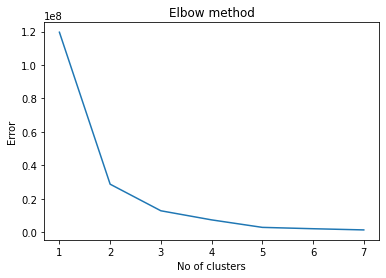

In [7]:
Error =[]
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 8), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
#plt.show()

Text(0, 0.5, 'Quantity')

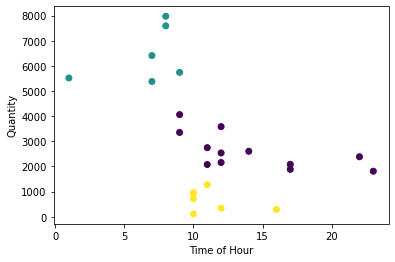

In [8]:
plt.scatter(x = c['TransactionDateTime1'], y = c['Quantity1'], c = y_kmeans) # clustered data plot
plt.xlabel('Time of Hour')
plt.ylabel('Quantity')

In [9]:
c.sort_values(['Quantity1'], ascending = False, inplace = True)
med = c['Quantity1'].median()
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
18,Outlet-14,3,7975.04,8,1
16,Outlet-14,1,7591.65,8,1
19,Outlet-14,4,6411.93,7,1
20,Outlet-14,5,5741.55,9,1
17,Outlet-14,2,5518.64,1,1
9,Outlet-12,6,5379.52,7,1
22,Outlet-14,7,4061.07,9,0
5,Outlet-12,2,3583.32,12,0
21,Outlet-14,6,3352.24,9,0
3,Outlet-11,4,2746.91,11,0


In [10]:
c1 = c[c['Quantity1'] > med] 
c2 = c1.groupby([c['OutletNumber']])['OutletNumber'].count()
c2.idxmax(axis = 1)

'Outlet-14'

In [14]:
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
18,Outlet-14,3,7975.04,8,1
16,Outlet-14,1,7591.65,8,1
19,Outlet-14,4,6411.93,7,1
20,Outlet-14,5,5741.55,9,1
17,Outlet-14,2,5518.64,1,1
9,Outlet-12,6,5379.52,7,1
22,Outlet-14,7,4061.07,9,0
5,Outlet-12,2,3583.32,12,0
21,Outlet-14,6,3352.24,9,0
3,Outlet-11,4,2746.91,11,0
